https://qiita.com/sai-sui/items/10adf84a4e3761706cd0

https://qiita.com/sai-sui/items/e3c48cc5cc4c4a7667cf

https://deepage.net/features/numpy-convolve.html

x(t)


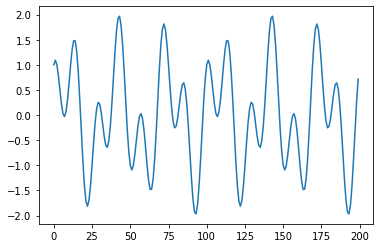

Mother Wavelet


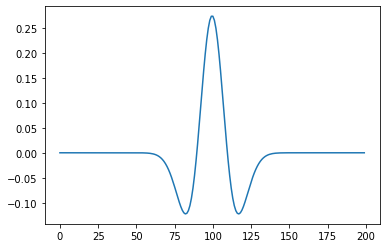

Xw(a, b)


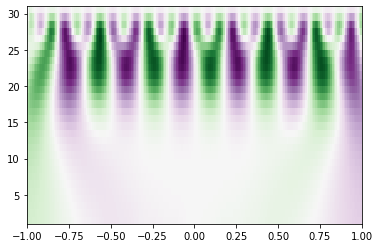

In [64]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.sin(np.pi * 6 * t)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
print('x(t)')
plt.plot(sig)
plt.show()
print('Mother Wavelet')
plt.plot(signal.ricker(200, 10))
plt.show()
print('Xw(a, b)')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

Wavelet解析は任意の関数で与えられるMother Wavelet $\Psi(t)$を用いる。
以下で説明するように、Mother Wavelet関数に対して、スケーリングと位相変換を施すことで、シグナルx(t)に精度良くフィッティングできるaとbを探す。
$$
\frac{1}{\sqrt{a}} \Psi \bigg(\frac{t-b}{a} \bigg)
$$
よく使うのはRicker Waveletで、以下の式で書ける
$$
\Psi(t) = \frac{2}{\sqrt{3 \sigma} \pi^{1/4}} \bigg(1- \Big(\frac{t}{\sigma}\Big)^2\bigg) e^{-\frac{t^2}{2\sigma^2}}
$$

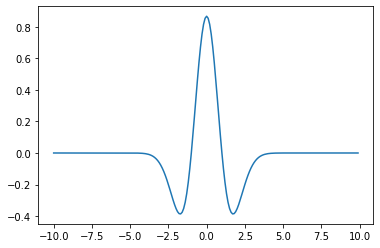

In [65]:
def ricker(t, s=1.0):
    a = 2 /(np.sqrt(3 * s) * np.pi**0.25)
    b = 1 - (t / s)**2
    c = np.e**(-1 * t**2 / (2 * s**2))
    return a * b * c

s = 0.1
x = np.arange(-10, 10, s)
y1 = ricker(x,1.0)
plt.plot(x, y1)
plt.show()

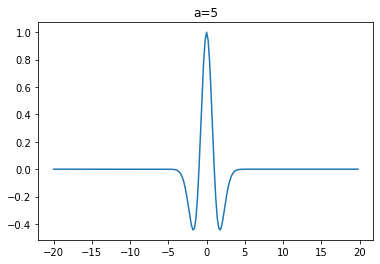

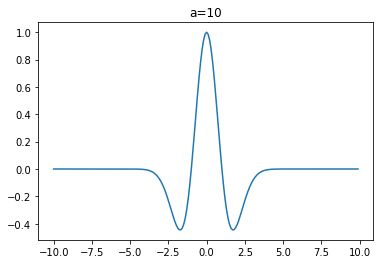

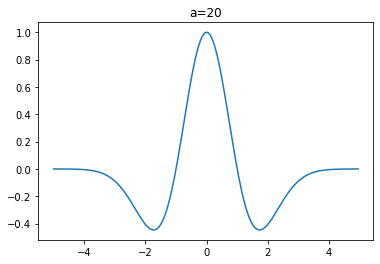

In [81]:
def s_ricker(wid, a):
    x = (np.arange(wid) - int(wid / 2)) / a
    return ricker(x)

wid = 200

a = 5
x = (np.arange(wid) - int(wid / 2)) / a
y1 = s_ricker(wid, a)
plt.plot(x, y1 / np.max(y1))
plt.title("a="+str(a))
plt.show()

a = 10
x = (np.arange(wid) - int(wid / 2)) / a
y1 = s_ricker(wid, a)
plt.plot(x, y1 / np.max(y1))
plt.title("a="+str(a))
plt.show()

a = 20
x = (np.arange(wid) - int(wid / 2)) / a
y1 = s_ricker(wid, a)
plt.plot(x, y1 / np.max(y1))
plt.title("a="+str(a))
plt.show()

In [82]:
def cwt(d, mw, wid):
    y = np.zeros([len(wid), len(d)])
    for i, j in enumerate(wid):
        wave = mw(min(10 * j, len(d)), j)
        y[i, :] = np.convolve(d, wave, mode='same')
    return y

#Mother Wavelet関数とのフィッティングを行うための関数。
#convolveは移動平均を計算している。

input


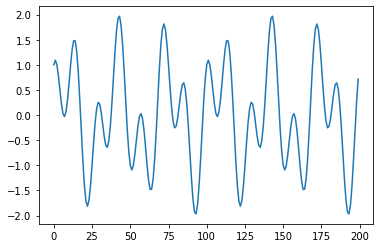

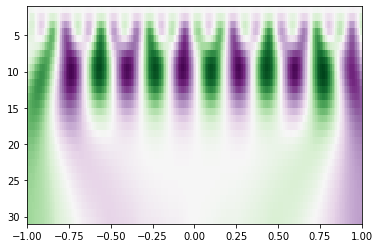

In [83]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.sin(np.pi * 6 * t)
print('input')
plt.plot(sig)
plt.show()

widths = np.arange(1, 31)
cy = cwt(sig, s_ricker, widths)

plt.imshow(cy, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cy).max(), vmin=-abs(cy).max())
plt.show()